In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [58]:
import pandas as pd

# read the datasets
df1 = pd.read_csv(r"/content/calories.csv")
df2 = pd.read_csv(r"/content/exercise.csv")

# print the datasets
print(df1.head())
print(df2.head())
concat_data = pd.concat([df1, df2], ignore_index=True)
print(concat_data)


    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8
        User_ID  Calories  Gender   Age  Height  Weight  Duration  Heart_Rate  \
0      14733363     231.0     NaN   NaN     NaN     NaN       NaN         NaN   
1      14861698      66.0     NaN   NaN     NaN     NaN       NaN         NaN   
2      11179863      26.0     NaN   NaN     NaN     NaN       NaN         NaN   
3      16180408      71.0     NaN   NaN     NaN     NaN       NaN         NaN   
4      17771927    

In [59]:
merge_data = pd.merge(df1, df2, how='outer')
print(merge_data)


        User_ID  Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  \
0      14733363     231.0    male   68   190.0    94.0      29.0       105.0   
1      14861698      66.0  female   20   166.0    60.0      14.0        94.0   
2      11179863      26.0    male   69   179.0    79.0       5.0        88.0   
3      16180408      71.0  female   34   179.0    71.0      13.0       100.0   
4      17771927      35.0  female   27   154.0    58.0      10.0        81.0   
...         ...       ...     ...  ...     ...     ...       ...         ...   
14995  15644082      45.0  female   20   193.0    86.0      11.0        92.0   
14996  17212577      23.0  female   27   165.0    65.0       6.0        85.0   
14997  17271188      75.0  female   43   159.0    58.0      16.0        90.0   
14998  18643037      11.0    male   78   193.0    97.0       2.0        84.0   
14999  11751526      98.0    male   63   173.0    79.0      18.0        92.0   

       Body_Temp  
0           40.8  
1

In [60]:
# Save the merged data to a CSV file
merged_filename = "merged_data.csv"
merge_data.to_csv(merged_filename, index=False)
print(f"\nMerged data saved to {merged_filename}")


Merged data saved to merged_data.csv


In [61]:
# Load dataset
df = pd.read_csv('/content/merged_data.csv')

In [62]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [63]:
# Preprocessing: Encode and drop unnecessary columns
df.replace({'male': 0, 'female': 1}, inplace=True)
df.drop(['User_ID', 'Weight', 'Duration'], axis=1, inplace=True)


In [64]:
print("Dataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Calories    15000 non-null  float64
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Heart_Rate  15000 non-null  float64
 5   Body_Temp   15000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 703.2 KB


In [65]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
           Calories        Gender           Age        Height    Heart_Rate  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean      89.539533      0.503533     42.789800    174.465133     95.518533   
std       62.456978      0.500004     16.980264     14.258114      9.583328   
min        1.000000      0.000000     20.000000    123.000000     67.000000   
25%       35.000000      0.000000     28.000000    164.000000     88.000000   
50%       79.000000      1.000000     39.000000    175.000000     96.000000   
75%      138.000000      1.000000     56.000000    185.000000    103.000000   
max      314.000000      1.000000     79.000000    222.000000    128.000000   

          Body_Temp  
count  15000.000000  
mean      40.025453  
std        0.779230  
min       37.100000  
25%       39.600000  
50%       40.200000  
75%       40.600000  
max       41.500000  


In [66]:
# Features and target variable
features = df.drop(['Calories'], axis=1)
target = df['Calories'].values


In [67]:
# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.1, random_state=22)


In [68]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [69]:
# Train a model (e.g., Random Forest Regressor)
model = RandomForestRegressor()
model.fit(X_train, Y_train)


RandomForestRegressor()

In [70]:
# Predictions
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

In [71]:
# Evaluation Metrics
print("Training Metrics:")
print(f"MAE: {mean_absolute_error(Y_train, train_preds):.2f}")
print(f"MSE: {mean_squared_error(Y_train, train_preds):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_train, train_preds)):.2f}")
print(f"R²: {r2_score(Y_train, train_preds):.2f}")

print("\nValidation Metrics:")
print(f"MAE: {mean_absolute_error(Y_val, val_preds):.2f}")
print(f"MSE: {mean_squared_error(Y_val, val_preds):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_val, val_preds)):.2f}")
print(f"R²: {r2_score(Y_val, val_preds):.2f}")

Training Metrics:
MAE: 3.98
MSE: 31.82
RMSE: 5.64
R²: 0.99

Validation Metrics:
MAE: 10.46
MSE: 218.71
RMSE: 14.79
R²: 0.94


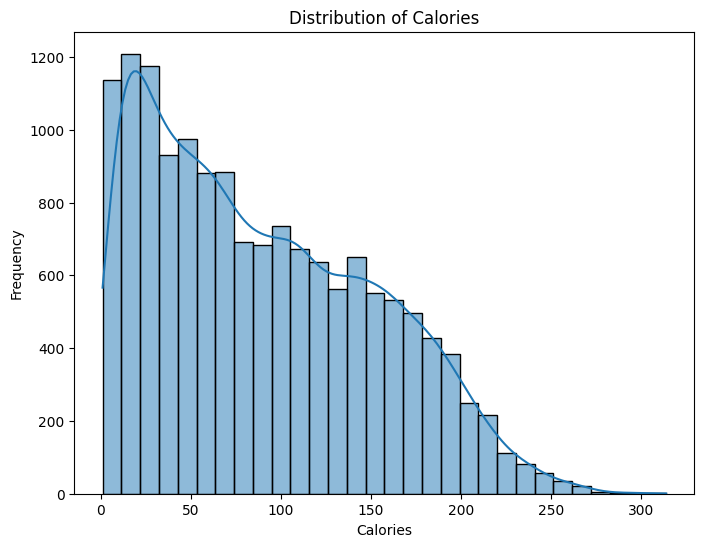

In [72]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df['Calories'], kde=True, bins=30)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

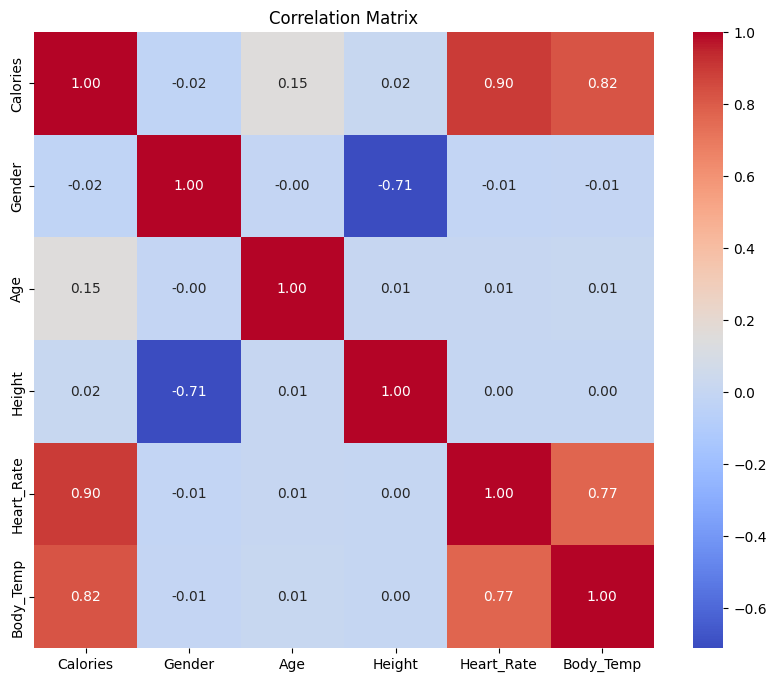

In [73]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

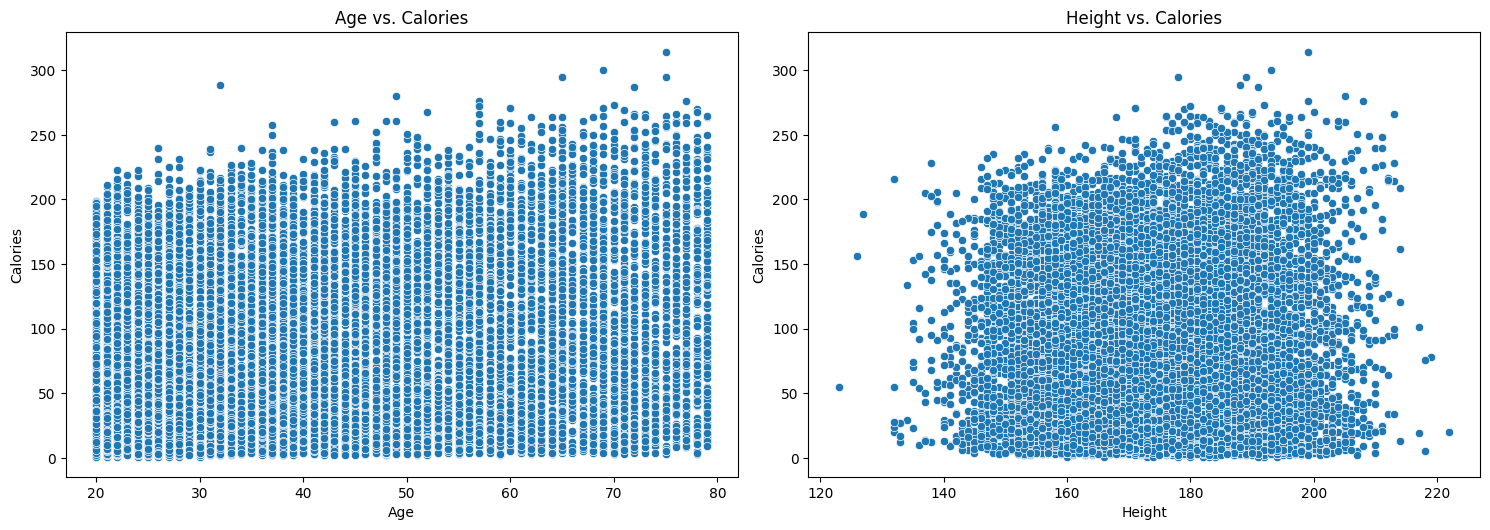

In [74]:
plt.figure(figsize=(15, 10))
features_to_plot = ['Age', 'Height']

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=df[feature], y=df['Calories'])
    plt.title(f'{feature} vs. Calories')

plt.tight_layout()
plt.show()


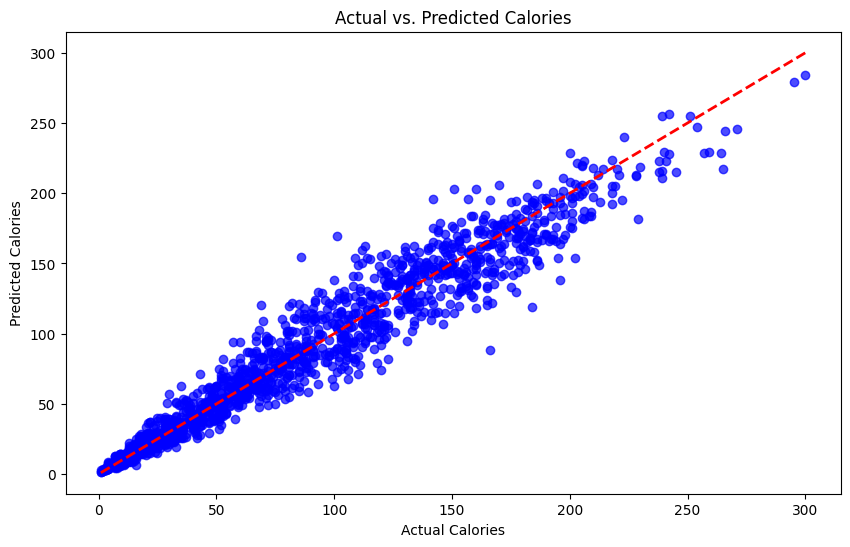

In [75]:
# Actual vs. Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_val, val_preds, alpha=0.7, color='blue')
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], 'k--', lw=2, color='red')
plt.title('Actual vs. Predicted Calories')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.show()

In [76]:
# Save the trained model and scaler
pickle.dump(model, open('calorie_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!
